# Основы описательной статистики, виды распределений в Python

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
# отображаем графики прямо в jupyter'e
%matplotlib inline

1. Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).

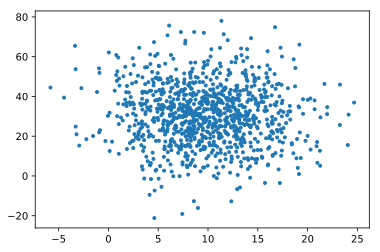

In [2]:
# Нормальное распределение с параметрами mean=10 и 30, sigma=5 и 15
norm_rv1 = sts.norm(loc=10, scale=5)
norm_rv2 = sts.norm(loc=30, scale=15)
# Генерация 1000 случайных чисел
x = norm_rv1.rvs(size=1000)
y = norm_rv2.rvs(size=1000)
plt.scatter(x, y, marker='.')

2. Нарисовать плотность распределения полученной выборки x.

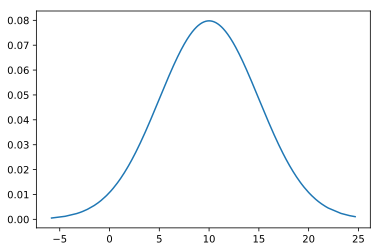

In [3]:
pdf = norm_rv1.pdf(sorted(x))
plt.plot(sorted(x), pdf)

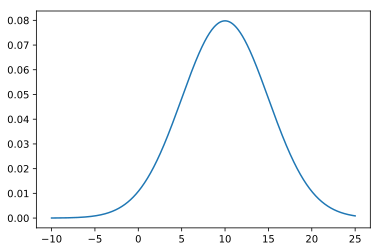

In [4]:
# или второй способ
norm_rv = sts.norm(loc=10, scale=5)
x = np.linspace(-10,25,1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

3. Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки.

In [5]:
X1 = np.vstack((x, y)).T

In [6]:
X = X1 - np.mean(X1, 0)
sx, sy = 2, 4
Scale = np.array([[sx, 0], [0, sy]])
Y = X.dot(Scale)
Y = Y + np.mean(X1, 0)

4. Построить график зависимости (корелляции) x от y.

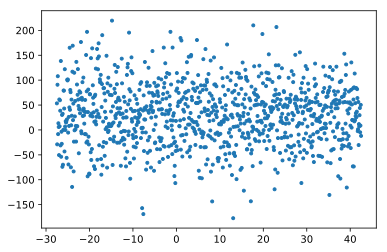

In [7]:
plt.scatter(Y[:,0], Y[:,1], marker='.')

In [8]:
# проверим корреляцию на нормированных данных
df=pd.DataFrame(Y)

In [9]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[[0, 1]])

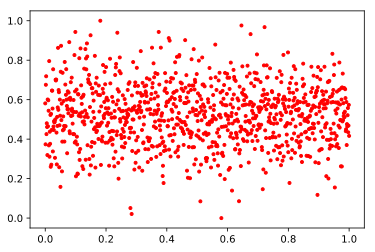

In [10]:
plt.plot(np_scaled[:, 0], np_scaled[:, 1], 'r.')

5. Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x.

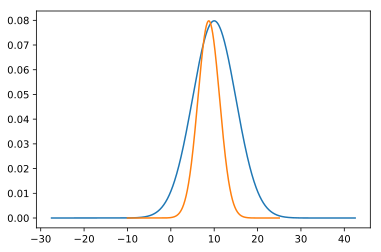

In [11]:
pdf = norm_rv1.pdf(sorted(Y[:, 0]))
plt.plot(sorted(Y[:, 0]), pdf)
plt.plot(x, pdf)

6. Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0?

In [12]:
corr, p_value = pearsonr(x, y)
print(corr)

-0.02410612234823969


In [13]:
# В нашем случае коэффициент корреляции равен -0.0115, это очень слабая отрицательная корреляция, 
# то есть считаем, что наши переменные независимы.

In [14]:
# Коэффициент равный 0 значит, что связи между x и y не существует, то есть переменные являются независимыми. 

In [15]:
# При отрицательном значении коэффициента корреляции: когда значение одной переменной возрастает, 
# то значение другой переменной убывает. 

In [16]:
# При положительном значении коэффициента корреляции: когда значение одной переменной возрастает, 
# то значение другой переменной тоже возраствет.

7. Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?

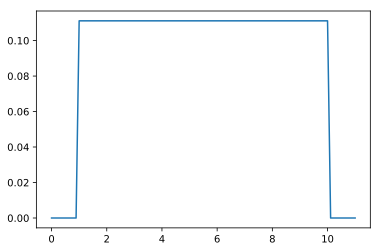

In [17]:
uniform_rv = sts.uniform(1, 9)

uniform_rv.rvs(size=100)

x1 = np.linspace(0, 11, 100)
pdf = uniform_rv.pdf(x1)
plt.plot(x1, pdf)

In [18]:
# При равномерном распределении плотность распределения на заданном отрезке - постоянна, вне его - равна нулю.
# В случае нормального распределения у случайной величины есть предпочтительное значение. 

8. Найти на графике примеры выброса. Что они означают?
https://github.com/yustiks/statistics_in_python/blob/master/dz.ipynb

In [19]:
# Выбросы - точки с координатами (0, 96), (40, 82), (79, 0), (82, 10)

In [20]:
# Выброс - это отклонение от общего распределения

9. Найти корелляцию в следующих данных:

import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold и например Average Price.
Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [21]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

In [22]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [23]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932


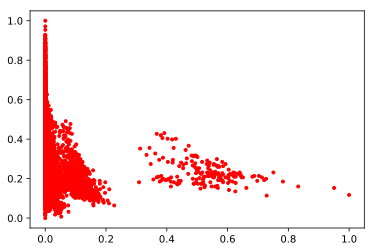

In [24]:
plt.plot(df_norm[0], df_norm[1], 'r.')

In [25]:
corr, p_value = pearsonr(df_norm[0], df_norm[1])
print(corr, p_value)

-0.2083170484878848 4.5949342992885564e-178


In [26]:
# Данные признаки мало коррелируют друг с другом 

Комментарий от преподавателя:
    
Решение в целом решено верно.
In [26]:
Данные признаки мало коррелируют друг с другом - на самом деле, корелляция есть, незначительная отрицательная.
Также можно было использовать чистку данных, чтобы посмотреть, насколько это может помочь в оценке корреляции.
Все остальное решено хорошо.
Ставлю зачет.
Желаю дальнейших успехов в образовании!